In [1]:
import random
import numpy as np
from scipy.interpolate import Rbf
import rbf
from rbf.interpolate import RBFInterpolant
from rbf.pde.nodes import disperse, poisson_disc_nodes, min_energy_nodes
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
local_seed = 13
local_random = random.Random()
local_random.seed(local_seed)

nmodules = 10

field_width_params = [35.0, 0.32]
field_width        = lambda x: 40. + field_width_params[0] * (np.exp(x / field_width_params[1]) - 1.)

module_grid_orientation   = [local_random.uniform(0, np.pi/3.) for i in xrange(nmodules)]
module_grid_spacing       = [field_width( float(i) / float(nmodules) ) for i in xrange(nmodules)]

In [3]:
grid_spacing     = module_grid_spacing[0]
grid_orientation = module_grid_orientation[0]

arena_dimension = 100 + grid_spacing/2
vert = np.array([[-arena_dimension,-arena_dimension],[-arena_dimension,arena_dimension],
                    [arena_dimension,arena_dimension],[arena_dimension,-arena_dimension]])
smp = np.array([[0,1],[1,2],[2,3],[3,0]])

print('grid spacing: %.02f' % grid_spacing)
print('grid orientation: %.02f' % grid_orientation)

grid spacing: 40.00
grid orientation: 0.27


Text(0.5,1,'Poisson Disc nodes')

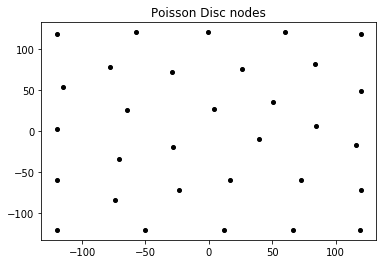

In [4]:
nodes1, groups, _ = poisson_disc_nodes(float(grid_spacing), (vert, smp), iterations=50, snap_delta=0.1)

fig, ax = plt.subplots()
ax.plot(nodes1[:, 0], nodes1[:, 1], 'ko', markersize=4)
ax.set_title('Poisson Disc nodes')

Text(0.5,1,'Minimum Energy nodes 2')

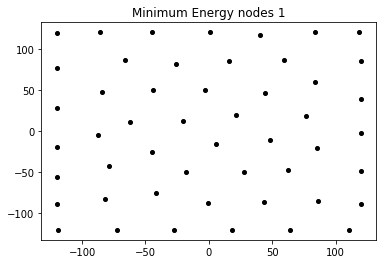

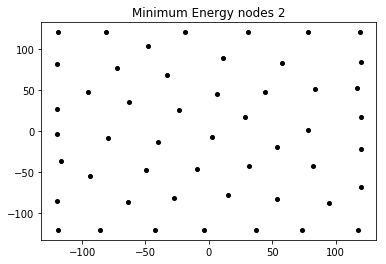

In [6]:
nodes2, groups, _ = min_energy_nodes(50, (vert, smp), iterations=50, snap_delta=0.1, start=0)

fig, ax = plt.subplots()
ax.plot(nodes2[:, 0], nodes2[:, 1], 'ko', markersize=4)
ax.set_title('Minimum Energy nodes 1')

nodes3, groups, _ = min_energy_nodes(50, (vert, smp), iterations=50, snap_delta=0.1, start=1000000)

fig, ax = plt.subplots()
ax.plot(nodes3[:, 0], nodes3[:, 1], 'ko', markersize=4)
ax.set_title('Minimum Energy nodes 2')